# Importando librerías

In [12]:
import os

import pandas as pd
import numpy as np

from tabulate import tabulate


# Lectura de datos

In [13]:
df = pd.read_csv('data/muestraDatosFullLimpiosUniviariado.csv', index_col=0)
df.head()

/tmp/ipykernel_13524/3078686613.py:1: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/muestraDatosFullLimpiosUniviariado.csv', index_col=0)


,index,Unnamed: 0,Id_Afiliado,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,TipoIdentificacion_datos,...,Discapacidad_datos,Etnia_datos,NivelEducativo_datos,TipoIdentificacion_idFalsos,Regimen,Condicion_Cronica_idSalud,NivelRiesgo_idSalud,Discapacidad_idSalud,Etnia_idSalud,NivelEducativo_idSalud
0,5163688,5163688,6511137.0,3427938,3427938,3428411,3429070,3429070,3429070,TI,...,NaN,NaN,NaN,TI,CONTRIBUTIVO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
1,481890,481890,607914.0,1715757,1715757,1715992,1716315,1716315,1716315,CC,...,NaN,NaN,NaN,CC,CONTRIBUTIVO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,BASICA SECUNDARIA
2,1617671,1617671,2039742.0,5751448,5751448,5752000,5752796,5752796,5752796,RC,...,NaN,NaN,NaN,RC,SUBSIDIADO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
3,4594758,4594758,5794516.0,3395522,3395522,3395995,3396651,3396651,3396651,TI,...,NaN,NaN,NaN,TI,CONTRIBUTIVO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
4,2537788,2537788,3200242.0,3431598,3431598,3432071,3432730,3432730,3432730,TI,...,NaN,NaN,NaN,TI,CONTRIBUTIVO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO


# Limpieza de datos

In [14]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

print(df.shape)

df = df.drop(columns=['TipoIdentificacion_datos', 'Nombre', 'Apellido 1', 'Apellido 2', 'idFalso', 'Regimen', 'Telfono celular Nacional',
       'Telfono celular (Cabecera Mpal)',
       'Telfono celular (Centro Poblado y Rural)',
       'Computador de escritorio Nacional',
       'Computador de escritorio (Cabecera Mpal)',
       'Computador de escritorio (Centro Poblado y Rural)',
       'Computador porttil Nacional', 'Computador porttil (Cabecera Mpal)',
       'Computador porttil (Centro Poblado y Rural)', 'Tableta Nacional',
       'Tableta (Cabecera Mpal)', 'Tableta (Centro Poblado y Rural)',
       'Otros dispositivos Nacional', 'Otros dispositivos (Cabecera Mpal)',
       'Otros dispositivos (Centro Poblado y Rural)', 'TELEFONO', 'CorreoElectronico'])

print(df.columns)

df.head()

(1044692, 71)
Index(['index', 'Id_Afiliado', 'FechaNacimiento', 'Genero', 'TipoAfiliado',
       'Regionales', 'Zonales', 'Departamento', 'Municipios', 'Zonas',
       'CodigoDane', 'REGIMEN', 'AfilidoPAC', 'Edades', 'Generacion',
       'PQRS 2020', 'Multiquejoso', 'PortalWeb 2020', 'APP 2020',
       'CallCenter 2020', 'OAA 2020', 'AsesorAClic 2020', 'ViveDigital 2020',
       'IVR 2020', 'ChatEnLinea', 'Digitalizacion generacion',
       'categoriaNivelDePQRS', 'categoriaNivelDeUsoPortalWeb',
       'categoriaNivelDeUsoAPP', 'categoriaNivelDeUsoCallCenter',
       'categoriaNivelDeUsoOAA', 'categoriaNivelDeUsoAsesorAClic',
       'categoriaNivelDeUsoChatEnLinea', 'categoriaNivelDeUsoIVR',
       'digitalizacionOficial', 'mujerEnEdadFertil',
       'categoriaNivelDeDigitalizacionOficial', 'Condicion_Cronica_datos',
       'NivelRiesgo_datos', 'Discapacidad_datos', 'Etnia_datos',
       'NivelEducativo_datos', 'TipoIdentificacion_idFalsos',
       'Condicion_Cronica_idSalud', 'NivelRi

,index,Id_Afiliado,FechaNacimiento,Genero,TipoAfiliado,Regionales,Zonales,Departamento,Municipios,Zonas,...,NivelRiesgo_datos,Discapacidad_datos,Etnia_datos,NivelEducativo_datos,TipoIdentificacion_idFalsos,Condicion_Cronica_idSalud,NivelRiesgo_idSalud,Discapacidad_idSalud,Etnia_idSalud,NivelEducativo_idSalud
0,5163688,6511137.0,05/07/2011,F,BENEFICIARIO,R BOGOTA,BOGOTA,DISTRITO CAPITAL,"BOGOTA, D.C.",Metropolitano Bogota,...,NaN,NaN,NaN,NaN,TI,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
1,481890,607914.0,02/10/1972,F,COTIZANTE,R BOGOTA,BOGOTA,DISTRITO CAPITAL,"BOGOTA, D.C.",Metropolitano Bogota,...,NaN,NaN,NaN,NaN,CC,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,BASICA SECUNDARIA
2,1617671,2039742.0,27/08/2016,F,BENEFICIARIO,R BOGOTA,BOGOTA,DISTRITO CAPITAL,"BOGOTA, D.C.",Metropolitano Bogota,...,NaN,NaN,NaN,NaN,RC,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
3,4594758,5794516.0,17/07/2012,F,BENEFICIARIO,R BOGOTA,BOGOTA,DISTRITO CAPITAL,"BOGOTA, D.C.",Metropolitano Bogota,...,NaN,NaN,NaN,NaN,TI,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
4,2537788,3200242.0,15/09/2009,F,BENEFICIARIO,R BOGOTA,BOGOTA,DISTRITO CAPITAL,"BOGOTA, D.C.",Metropolitano Bogota,...,NaN,NaN,NaN,NaN,TI,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO


# Descriptivos

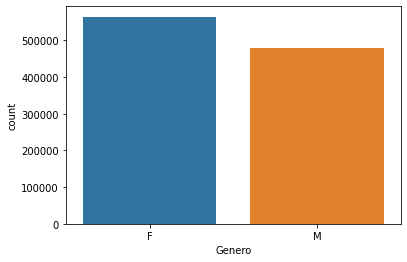

F    564497
M    480195
Name: Genero, dtype: int64


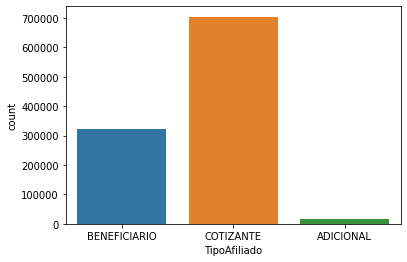

COTIZANTE       704503
BENEFICIARIO    324046
ADICIONAL        16143
Name: TipoAfiliado, dtype: int64


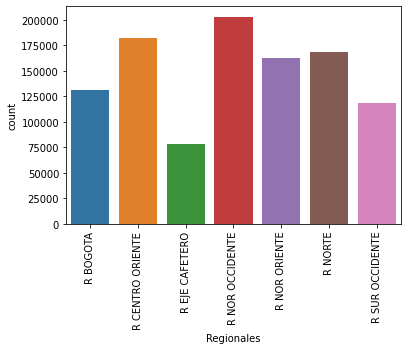

R NOR OCCIDENTE     202918
R CENTRO ORIENTE    181905
R NORTE             168773
R NOR ORIENTE       162853
R BOGOTA            131575
R SUR OCCIDENTE     118081
R EJE CAFETERO       78587
Name: Regionales, dtype: int64


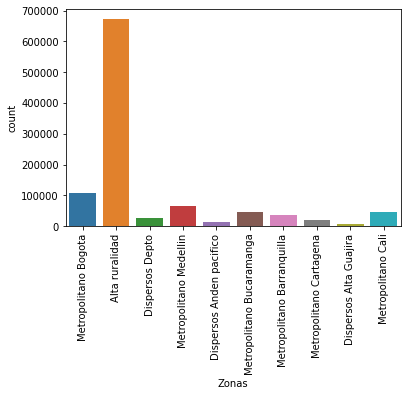

Alta ruralidad                673171
Metropolitano Bogota          108908
Metropolitano Medellin         64952
Metropolitano Bucaramanga      47174
Metropolitano Cali             46226
Metropolitano Barranquilla     36682
Dispersos Depto                26565
Metropolitano Cartagena        20634
Dispersos Anden pacifico       13241
Dispersos Alta Guajira          7139
Name: Zonas, dtype: int64


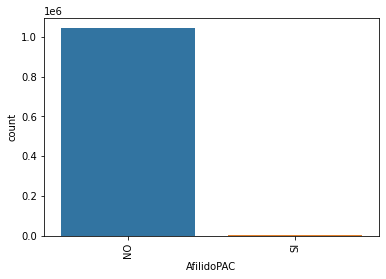

NO    1043279
SI       1413
Name: AfilidoPAC, dtype: int64


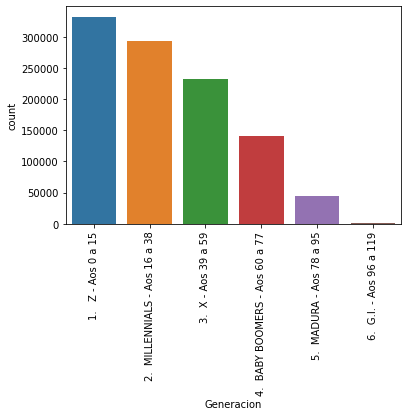

1.   Z - Aos 0 a 15               332021
2.  MILLENNIALS - Aos 16 a 38     293019
3.  X - Aos 39 a 59               232832
4.  BABY BOOMERS - Aos 60 a 77    140184
5.  MADURA - Aos 78 a 95           45041
6.  G.I. - Aos 96 a 119             1595
Name: Generacion, dtype: int64


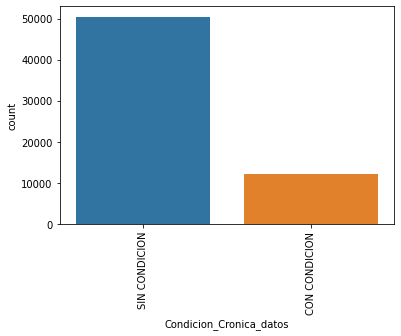

SIN CONDICION    50436
CON CONDICION    12127
Name: Condicion_Cronica_datos, dtype: int64


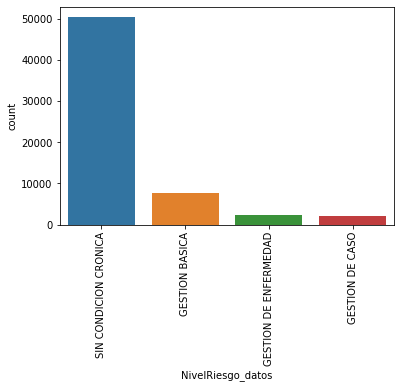

SIN CONDICION CRONICA    50436
GESTION BASICA            7699
GESTION DE ENFERMEDAD     2415
GESTION DE CASO           2013
Name: NivelRiesgo_datos, dtype: int64


In [26]:
# barplot of Genero
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Genero', data=df)
plt.show()
print(df['Genero'].value_counts())


# barplot of TipoAfiliado
sns.countplot(x='TipoAfiliado', data=df)
plt.show()
print(df['TipoAfiliado'].value_counts())

# barplot of Regionales
sns.countplot(x='Regionales', data=df)
plt.xticks(rotation=90)
plt.show()
print(df['Regionales'].value_counts())

# barplot of Zonas
sns.countplot(x='Zonas', data=df)
plt.xticks(rotation=90)
plt.show()
print(df['Zonas'].value_counts())

# barplot of AfilidoPAC
sns.countplot(x='AfilidoPAC', data=df)
plt.xticks(rotation=90)
plt.show()
print(df['AfilidoPAC'].value_counts())

# barplot of Generacion
sns.countplot(x='Generacion', data=df)
plt.xticks(rotation=90)
plt.show()
print(df['Generacion'].value_counts())

# barplot of Condicion_Cronica_datos
sns.countplot(x='Condicion_Cronica_datos', data=df)
plt.xticks(rotation=90)
plt.show()
print(df['Condicion_Cronica_datos'].value_counts())

# barplot of NivelRiesgo_datos
sns.countplot(x='NivelRiesgo_datos', data=df)
plt.xticks(rotation=90)
plt.show()
print(df['NivelRiesgo_datos'].value_counts())

